In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/test_data/ldl_prs.txt .

In [ ]:
! cut -d' ' -f3 ldl_prs.txt > a_col3.txt
! cut -d' ' -f3 paper.txt > b_col3.txt

In [ ]:
! grep -c '^19' paper.txt

1218


In [21]:
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/igsr_samples.tsv .
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/split_ids/by_superpopulation/EUR* .

In [16]:
! grep 'phase 3' igsr_samples.tsv > filtered_samples.tsv


In [22]:
! wc -l filtered_samples.tsv
! wc -l EUR_train.txt
! wc -l EUR_val.txt
! wc -l EUR_test.txt

3115 filtered_samples.tsv
457 EUR_train.txt
96 EUR_val.txt
108 EUR_test.txt


In [18]:
! awk -F'\t' 'NR>1 {count[$6]++} END {for (i in count) print i, count[i]}' filtered_samples.tsv

EAS 601
AFR 836
AMR 497
EUR 657
EUR,AFR 1
SAS 522


In [ ]:
# Import libraries
%pylab inline
import os
import csv
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# ! wget https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20231211.zip
# ! unzip plink_linux_x86_64_20231211.zip
# ! ./plink

In [ ]:
! wget https://s3.amazonaws.com/plink2-assets/alpha5/plink2_linux_x86_64_20240105.zip
! unzip plink2_linux_x86_64_20240105.zip
! ./plink2

--2024-03-11 00:35:06--  https://s3.amazonaws.com/plink2-assets/alpha5/plink2_linux_x86_64_20240105.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.195.112, 52.216.48.248, 16.182.39.168, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.195.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9266484 (8.8M) [application/zip]
Saving to: ‘plink2_linux_x86_64_20240105.zip’

plink2_linux_x86_64 100%[===================>]   8.84M  42.3MB/s    in 0.2s    

2024-03-11 00:35:06 (42.3 MB/s) - ‘plink2_linux_x86_64_20240105.zip’ saved [9266484/9266484]

Archive:  plink2_linux_x86_64_20240105.zip
  inflating: plink2                  
PLINK v2.00a5.10LM 64-bit Intel (5 Jan 2024)   www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3

  plink2 <input flag(s)...> [command flag(s)...] [other flag(s)...]
  plink2 --help [flag name(s)...]

Commands include --rm-dup list, --make-bpgen, --export, --fr

In [ ]:
!head -n 10 /content/drive/MyDrive/CSE-284-Final-Project/data/chr19_ldl_pheno/power=-0.25_her=0.9_num-causals=512.pheno

0 HG00096 -1.107044 -1.215778 -1.704484 -0.995185 -1.365799 -0.621652 -0.676746 -1.512593 -1.780164 -1.439749 -0.554559 -1.151093 -0.893698 -1.347664 -1.616704 -0.758645 -0.968776 -0.754217 -1.749669 -1.205287 -1.242741 -1.169732 -1.659914 -1.205588 -1.091213 -1.795153 -1.257381 -1.495473 -1.420209 -1.619440 -1.255575 -1.512802 -0.891579 -1.356832 -1.406791 -1.883521 -0.806860 -1.113352 -1.661203 -1.185024 -1.192756 -0.825975 -1.023094 -2.000873 -1.270047 -1.145541 -1.576674 -1.648591 -0.913374 -1.323303 -1.056818 -1.172338 -1.244784 -1.991998 -1.495054 -1.557855 -1.480354 -1.612820 -0.898757 -1.189610 -1.511485 -1.593118 -1.249223 -1.876525 -0.631540 -0.521159 -1.637079 -1.374904 -1.677736 -1.415298 -0.881230 -1.253788 -1.465289 -1.571255 -1.116468 -1.605500 -1.460020 -1.811784 -0.971336 -1.193030 -1.643454 -1.607149 -1.462569 -1.256204 -1.458407 -0.947535 -1.083158 -1.856140 -1.581749 -1.553019 -1.284812 -1.485012 -1.249776 -1.057600 -1.041404 -1.730156 -1.030367 -1.350577 -1.667788 

In [ ]:
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/1000g_by_chrom/chr19.* .
! head chr19.bim
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/split_ids/by_population/CEU_all.txt .
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/split_ids/by_population/GBR_all.txt .
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/split_ids/by_population/FIN_all.txt .
! awk '{print $2}' CEU_all.txt > CEU_train_IID_only.txt
! awk '{print $2}' GBR_all.txt > GBR_val_IID_only.txt
! awk '{print $2}' FIN_all.txt > FIN_test_IID_only.txt

19	rs372156287	0	69984	A	G
19	rs199696009	0	95794	C	A
19	rs571287431	0	103810	T	A
19	rs549887024	0	130998	G	A
19	rs373248213	0	140465	T	C
19	rs567729306	0	157742	A	G
19	rs535051239	0	157892	A	G
19	rs567986644	0	160565	C	T
19	rs565810600	0	161091	G	T
19	rs577924063	0	173104	G	A


In [ ]:
chr19 = '/content/chr19'
keep = 'CEU_train_IID_only.txt'
out = 'CEU_train'

sh = f'''
./plink2 \
  --make-bed \
  --bfile {chr19} \
  --keep {keep} \
  --out {out}
'''

with open('chr19.sh', 'w') as file:
    file.write(sh)

!bash chr19.sh

PLINK v2.00a5.10LM 64-bit Intel (5 Jan 2024)   www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to CEU_train.log.
Options in effect:
  --bfile /content/chr19
  --keep CEU_train_IID_only.txt
  --make-bed
  --out CEU_train

Start time: Mon Mar 11 00:37:44 2024
12978 MiB RAM detected, ~11485 available; reserving 6489 MiB for main
workspace.
Using up to 2 compute threads.
2504 samples (1270 females, 1234 males; 2497 founders) loaded from
/content/chr19.fam.
283173 variants loaded from /content/chr19.bim.
Note: No phenotype data present.
--keep: 99 samples remaining.
99 samples (50 females, 49 males; 99 founders) remaining after main filters.
Writing CEU_train.fam ... done.
Writing CEU_train.bim ... done.
Writing CEU_train.bed ... 0%23%46%69%92%done.
End time: Mon Mar 11 00:37:44 2024


In [ ]:
keep = 'GBR_val_IID_only.txt'
out = 'GBR_val'

sh = f'''
./plink2 \
  --make-bed \
  --bfile {chr19} \
  --keep {keep} \
  --out {out}
'''

with open('chr19.sh', 'w') as file:
    file.write(sh)

!bash chr19.sh

PLINK v2.00a5.10LM 64-bit Intel (5 Jan 2024)   www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to GBR_val.log.
Options in effect:
  --bfile /content/chr19
  --keep GBR_val_IID_only.txt
  --make-bed
  --out GBR_val

Start time: Mon Mar 11 00:37:54 2024
12978 MiB RAM detected, ~11469 available; reserving 6489 MiB for main
workspace.
Using up to 2 compute threads.
2504 samples (1270 females, 1234 males; 2497 founders) loaded from
/content/chr19.fam.
283173 variants loaded from /content/chr19.bim.
Note: No phenotype data present.
--keep: 91 samples remaining.
91 samples (45 females, 46 males; 91 founders) remaining after main filters.
Writing GBR_val.fam ... done.
Writing GBR_val.bim ... done.
Writing GBR_val.bed ... 0%23%46%69%92%done.
End time: Mon Mar 11 00:37:54 2024


In [ ]:
keep = 'FIN_test_IID_only.txt'
out = 'FIN_test'

sh = f'''
./plink2 \
  --make-bed \
  --bfile {chr19} \
  --keep {keep} \
  --out {out}
'''

with open('chr19.sh', 'w') as file:
    file.write(sh)

!bash chr19.sh

PLINK v2.00a5.10LM 64-bit Intel (5 Jan 2024)   www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to FIN_test.log.
Options in effect:
  --bfile /content/chr19
  --keep FIN_test_IID_only.txt
  --make-bed
  --out FIN_test

Start time: Mon Mar 11 00:44:09 2024
12978 MiB RAM detected, ~11571 available; reserving 6489 MiB for main
workspace.
Using up to 2 compute threads.
2504 samples (1270 females, 1234 males; 2497 founders) loaded from
/content/chr19.fam.
283173 variants loaded from /content/chr19.bim.
Note: No phenotype data present.
--keep: 99 samples remaining.
99 samples (61 females, 38 males; 99 founders) remaining after main filters.
Writing FIN_test.fam ... done.
Writing FIN_test.bim ... done.
Writing FIN_test.bed ... 0%23%46%69%92%done.
End time: Mon Mar 11 00:44:10 2024


In [ ]:
POWER = -0.25
HER = 0.9
NUM_CAUSALS = 512

PREFIX = '/content'
POP = 'EUR'
GENO_TRAIN = f'{PREFIX}/CEU_train'
GENO_VAL = f'{PREFIX}/GBR_val'
GENO_TEST = f'{PREFIX}/FIN_test'
PHENO = f'{PREFIX}/power={POWER}_her={HER}_num-causals={NUM_CAUSALS}.pheno'

In [ ]:
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/chr19_ldl_pheno/power={POWER}_her={HER}_num-causals={NUM_CAUSALS}.pheno .

In [ ]:
sh = f'''
./plink2 --bfile {GENO_TRAIN} \
         --pheno {PHENO} \
         --glm allow-no-covars \
         --maf 0.05 \
         --out {POP}_gwas
'''

with open('gwas.sh', 'w') as file:
    file.write(sh)
!bash gwas.sh

PLINK v2.00a5.10LM 64-bit Intel (5 Jan 2024)   www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to EUR_gwas.log.
Options in effect:
  --bfile /content/CEU_train
  --glm allow-no-covars
  --maf 0.05
  --out EUR_gwas
  --pheno /content/power=-0.25_her=0.9_num-causals=512.pheno

Start time: Mon Mar 11 00:41:09 2024
12978 MiB RAM detected, ~11554 available; reserving 6489 MiB for main
workspace.
Using up to 2 compute threads.
99 samples (50 females, 49 males; 99 founders) loaded from
/content/CEU_train.fam.
283173 variants loaded from /content/CEU_train.bim.
100 quantitative phenotypes loaded.
Calculating allele frequencies... 0%23%46%69%92%done.
140483 variants removed due to allele frequency threshold(s)
(--maf/--max-maf/--mac/--max-mac).
142690 variants remaining after main filters.
--glm linear regression on quantitative phenotypes #1-100: 0%22%46%68%92%done.
Results written to EUR_gwas.<p

In [ ]:
PHENO_NUM_START = 1
PHENO_NUM_END = 100
combined_prediction_data = []
combined_result_data = []

for PHENO_NUM in range(PHENO_NUM_START, PHENO_NUM_END + 1):

    GLM = f'/content/{POP}_gwas.PHENO{PHENO_NUM}.glm.linear'

    sh = f'''
    ./plink2 \
        --bfile {GENO_TRAIN} \
        --clump-p1 1 \
        --clump-r2 0.1 \
        --clump-kb 250 \
        --clump {GLM} \
        --out {POP}_gwas.PHENO{PHENO_NUM}

    awk 'NR!=1{{print $3}}' {POP}_gwas.PHENO{PHENO_NUM}.clumps > {POP}_gwas.PHENO{PHENO_NUM}.valid.snp
    cat {POP}_gwas.PHENO{PHENO_NUM}.clumps | awk '{{print $3 "\t" $4}}' > {POP}_gwas.PHENO{PHENO_NUM}.pvals
    '''

    with open('clump.sh', 'w') as file:
        file.write(sh)
    !bash clump.sh

    GLM = f'/content/{POP}_gwas.PHENO{PHENO_NUM}.glm.linear'
    PVALS = f'/content/{POP}_gwas.PHENO{PHENO_NUM}.pvals'
    VAL = f'/content/{POP}_gwas.PHENO{PHENO_NUM}.valid.snp'

    sh = f'''
    echo "0.000001 0 0.000001" > range_list
    echo "0.00001 0 0.00001" >> range_list
    echo "0.0001 0 0.0001" >> range_list
    echo "0.001 0 0.001" >> range_list
    echo "0.05 0 0.05" >> range_list
    echo "0.1 0 0.1" >> range_list

    ./plink2 \
    --bfile {GENO_TRAIN} \
    --score {GLM} 3 7 12 header cols=+scoresums\
    --q-score-range range_list {PVALS} \
    --extract {VAL} \
    --out {POP}_PHENO{PHENO_NUM}_train

    ./plink2 \
    --bfile {GENO_VAL} \
    --score {GLM} 3 7 12 header cols=+scoresums\
    --q-score-range range_list {PVALS} \
    --extract {VAL} \
    --out {POP}_PHENO{PHENO_NUM}_val

    ./plink2 \
    --bfile {GENO_TEST} \
    --score {GLM} 3 7 12 header cols=+scoresums\
    --q-score-range range_list {PVALS} \
    --extract {VAL} \
    --out {POP}_PHENO{PHENO_NUM}_test
    '''

    with open('score.sh', 'w') as file:
      file.write(sh)
    !bash score.sh

    pval_list = ["0.000001", "0.00001", "0.0001", "0.001", "0.05", "0.1"]
    best_pval_idx = 0
    train_scores = []
    val_scores = []
    test_scores = []
    train_score = 0
    val_score = 0
    test_score = 0

    print("Training: ")
    for pval in pval_list:
        score_file = f'{POP}_PHENO{PHENO_NUM}_train.{pval}.sscore'
        if os.path.isfile(score_file) == False:
          continue
        prs = pd.read_csv(score_file, delim_whitespace=True)
        phen = pd.read_csv(f'{PHENO}',
                      delim_whitespace=True, usecols=[0, 1, PHENO_NUM + 1], names=["FID","IID","phen"])
        d = pd.merge(prs, phen, on=["IID"])
        score = scipy.stats.pearsonr(d["phen"], d["SCORE1_SUM"])[0] ** 2
        train_scores.append(score)
        print("pval=%s, R2=%s"%(pval, score))
    train_score = np.nanmax(train_scores)

    print("Validation: ")
    for pval in pval_list:
        score_file = f'{POP}_PHENO{PHENO_NUM}_val.{pval}.sscore'
        if os.path.isfile(score_file) == False:
          val_scores.append(-1)
          continue
        prs = pd.read_csv(score_file, delim_whitespace=True)
        phen = pd.read_csv(f'{PHENO}',
                      delim_whitespace=True, usecols=[0, 1, PHENO_NUM + 1], names=["FID","IID","phen"])
        d = pd.merge(prs, phen, on=["IID"])
        score = scipy.stats.pearsonr(d["phen"], d["SCORE1_SUM"])[0] ** 2
        val_scores.append(score)
        print("pval=%s, R2=%s"%(pval, score))
    val_score = np.nanmax(val_scores)
    best_pval_idx = val_scores.index(val_score)
    print("Best: ", pval_list[best_pval_idx], val_score)

    print("Testing: ")
    best_pval = pval_list[best_pval_idx]
    prs = pd.read_csv(f'{POP}_PHENO{PHENO_NUM}_test.{best_pval}.sscore', delim_whitespace=True)
    phen = pd.read_csv(f'{PHENO}',
                      delim_whitespace=True, usecols=[0, 1, PHENO_NUM + 1], names=["FID","IID","phen"])
    d = pd.merge(prs, phen, on=["IID"])
    test_score = scipy.stats.pearsonr(d["phen"], d["SCORE1_SUM"])[0] ** 2
    print("pval=%s, R2=%s"%(best_pval, test_score))
    predict_df = d[['IID', 'SCORE1_SUM', 'phen']].copy()
    predict_df.rename(columns={'IID': 'IID', 'SCORE1_SUM': 'predict', 'phen': 'actual'}, inplace=True)
    predict_df["pheno_num"] = PHENO_NUM
    combined_prediction_data.append(predict_df)

    result_dict = {
        "population/superpopulation": POP,
        "power": POWER,
        "her": HER,
        "num_causals": NUM_CAUSALS,
        "pheno_num": PHENO_NUM,
        "train": train_score,
        "val": val_score,
        "test": test_score
    }
    combined_result_data.append(result_dict)

combined_prediction_df = pd.concat(combined_prediction_data, ignore_index=True)
combined_result_df = pd.DataFrame(combined_result_data)

# Write combined prediction data to file
combined_prediction_file = f'combined_predict_{POP}_power={POWER}_her={HER}_num-causals={NUM_CAUSALS}_pheno={PHENO_NUM_START}-{PHENO_NUM_END}.csv'
combined_prediction_df.to_csv(combined_prediction_file, index=False)
print("Combined prediction data has been written to:", combined_prediction_file)

# Write combined result data to file
combined_result_file = f'combined_result_{POP}_power={POWER}_her={HER}_num-causals={NUM_CAUSALS}_pheno={PHENO_NUM_START}-{PHENO_NUM_END}.csv'
combined_result_df.to_csv(combined_result_file, index=False)
print("Combined result data has been written to:", combined_result_file)


Streaming output truncated to the last 5000 lines.
12978 MiB RAM detected, ~11598 available; reserving 6489 MiB for main
workspace.
Using up to 2 compute threads.
99 samples (50 females, 49 males; 99 founders) loaded from
/content/CEU_train.fam.
283173 variants loaded from /content/CEU_train.bim.
Note: No phenotype data present.
--extract: 5192 variants remaining.
Calculating allele frequencies... 0%29%47%65%91%done.
5192 variants remaining after main filters.
--q-score-range: 6 ranges and 5192 variants loaded.
(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)
--score: 5192 variants processed.
--score + --q-score-range: Results written to EUR_PHENO62_train.<range
name>.sscore .
End time: Mon Mar 11 00:46:44 2024
PLINK v2.00a5.10LM 64-bit Intel (5 Jan 2024)   www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to EUR_PHENO62_val.log.
Options in effect:
  --bfile /conte

In [ ]:
print(combined_prediction_df)
print(combined_result_df)

          IID   predict    actual  pheno_num
0     HG00171  0.000000 -0.313430          1
1     HG00173  0.000000  0.481810          1
2     HG00174  0.000000 -0.766593          1
3     HG00176  0.000000 -1.266699          1
4     HG00177  0.000000 -0.645353          1
...       ...       ...       ...        ...
9895  HG00380  0.000000 -1.841463        100
9896  HG00381  0.953933 -1.127381        100
9897  HG00382  0.000000 -0.741640        100
9898  HG00383  0.000000  0.538310        100
9899  HG00384  0.000000 -1.211307        100

[9900 rows x 4 columns]
   population/superpopulation  power  her  num_causals  pheno_num     train  \
0                         EUR  -0.25  0.9          512          1  0.980649   
1                         EUR  -0.25  0.9          512          2  0.980717   
2                         EUR  -0.25  0.9          512          3  0.978881   
3                         EUR  -0.25  0.9          512          4  0.977257   
4                         EUR  -0.25  0.

In [ ]:
! cp combined_predict_{POP}_power={POWER}_her={HER}_num-causals={NUM_CAUSALS}_pheno={PHENO_NUM_START}-{PHENO_NUM_END}.csv /content/drive/MyDrive/CSE-284-Final-Project/data/test_data/C+T/
! cp combined_result_{POP}_power={POWER}_her={HER}_num-causals={NUM_CAUSALS}_pheno={PHENO_NUM_START}-{PHENO_NUM_END}.csv /content/drive/MyDrive/CSE-284-Final-Project/data/test_data/C+T/

In [ ]:
!head -n 10 EUR_PHENO1_val.0.1.sscore

head: cannot open 'EUR_PHENO1_val.0.1.sscore' for reading: No such file or directory


In [ ]:
! ./plink2 \
    --bfile {GENO_TEST} \
    --score {GLM} 3 7 12 header cols=+scoresums\
    --q-score-range range_list {PVALS} \
    --extract {VAL} \
    --out {POP}_PHENO{PHENO_NUM}_val

PLINK v2.00a5.10LM 64-bit Intel (5 Jan 2024)   www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to EUR_PHENO100_val.log.
Options in effect:
  --bfile /content/EUR_test
  --extract /content/EUR_gwas.PHENO100.valid.snp
  --out EUR_PHENO100_val
  --q-score-range range_list /content/EUR_gwas.PHENO100.pvals
  --score /content/EUR_gwas.PHENO100.glm.linear 3 7 12 header cols=+scoresums

Start time: Sun Mar 10 22:10:24 2024
12978 MiB RAM detected, ~11503 available; reserving 6489 MiB for main
workspace.
Using up to 2 compute threads.
59 samples (30 females, 29 males; 59 founders) loaded from
/content/EUR_test.fam.
283173 variants loaded from /content/EUR_test.bim.
Note: No phenotype data present.
--extract: 5827 variants remaining.
Calculating allele frequencies... 0%29%46%65%91%done.
5827 variants remaining after main filters.
--q-score-range: 6 ranges and 5827 variants loaded.
(Add the 'list-variants' modifie

In [ ]:
sh = f'''
./plink \
    --bfile {GENO_TRAIN} \
    --score {GLM} 3 7 12 header sum\
    --q-score-range range_list {PVALS} \
    --extract {VAL} \
    --out {POP}_PHENO{PHENO_NUM}_train
'''

with open('test_score.sh', 'w') as file:
      file.write(sh)
    !bash test_score.sh

In [ ]:
PREFIX = '/content/drive/MyDrive/CSE-284-Final-Project/data'
GENO_TRAIN = f'{PREFIX}/1000g_by_superpopulation/{POP}_train'
GENO_VAL = f'{PREFIX}/1000g_by_superpopulation/{POP}_val'
GENO_TEST = f'{PREFIX}/1000g_by_superpopulation/{POP}_test'
PHENO = f'{PREFIX}/chr19_ldl_pheno/power={POWER}_her={HER}_num-causals={NUM_CAUSALS}.pheno'

In [ ]:
GLM = f'/content/{POP}_gwas.PHENO{PHENO_NUM}.glm.linear'

sh = f'''
./plink2 \
    --bfile {GENO_TRAIN} \
    --clump-p1 1 \
    --clump-r2 0.1 \
    --clump-kb 250 \
    --clump {GLM} \
    --out {POP}_gwas.PHENO{PHENO_NUM}

awk 'NR!=1{{print $3}}' {POP}_gwas.PHENO{PHENO_NUM}.clumps > {POP}_gwas.PHENO{PHENO_NUM}.valid.snp
cat {POP}_gwas.PHENO{PHENO_NUM}.clumps | awk '{{print $3 "\t" $4}}' > {POP}_gwas.PHENO{PHENO_NUM}.pvals
'''

with open('clump.sh', 'w') as file:
    file.write(sh)
!bash clump.sh

PLINK v2.00a5.10LM 64-bit Intel (5 Jan 2024)   www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to EUR_gwas.PHENO1.log.
Options in effect:
  --bfile /content/drive/MyDrive/CSE-284-Final-Project/data/1000g_by_superpopulation/EUR_train
  --clump /content/EUR_gwas.PHENO1.glm.linear
  --clump-kb 250
  --clump-p1 1
  --clump-r2 0.1
  --out EUR_gwas.PHENO1

Start time: Sat Mar  9 18:44:07 2024
12978 MiB RAM detected, ~11529 available; reserving 6489 MiB for main
workspace.
Using up to 2 compute threads.
403 samples (211 females, 192 males; 403 founders) loaded from
/content/drive/MyDrive/CSE-284-Final-Project/data/1000g_by_superpopulation/EUR_train.fam.
7667132 variants loaded from
/content/drive/MyDrive/CSE-284-Final-Project/data/1000g_by_superpopulation/EUR_train.bim.
Note: No phenotype data present.
--clump: 191670 clumps formed from 6038406 index candidates.  
Results written to EUR_gwas.PHENO1.clumps .
End time: Sat M

In [ ]:
PREFIX = '/content/drive/MyDrive/CSE-284-Final-Project/data'
GENO_TRAIN = f'{PREFIX}/1000g_by_superpopulation/{POP}_train'
GENO_VAL = f'{PREFIX}/1000g_by_superpopulation/{POP}_val'
GENO_TEST = f'{PREFIX}/1000g_by_superpopulation/{POP}_test'
GLM = f'/content/{POP}_gwas.PHENO{PHENO_NUM}.glm.linear'
PVALS = f'/content/{POP}_gwas.PHENO{PHENO_NUM}.pvals'
VAL = f'/content/{POP}_gwas.PHENO{PHENO_NUM}.valid.snp'

sh = f'''
echo "0.000001 0 0.000001" > range_list
echo "0.00001 0 0.00001" >> range_list
echo "0.0001 0 0.0001" >> range_list
echo "0.001 0 0.001" >> range_list
echo "0.05 0 0.05" >> range_list
echo "0.1 0 0.1" >> range_list

./plink \
    --bfile {GENO_TRAIN} \
    --score {GLM} 3 7 12 header sum\
    --q-score-range range_list {PVALS} \
    --extract {VAL} \
    --out {POP}_PHENO{PHENO_NUM}_train

./plink \
    --bfile {GENO_VAL} \
    --score {GLM} 3 7 12 header sum\
    --q-score-range range_list {PVALS} \
    --extract {VAL} \
    --out {POP}_PHENO{PHENO_NUM}_val

./plink \
    --bfile {GENO_TEST} \
    --score {GLM} 3 7 12 header sum\
    --q-score-range range_list {PVALS} \
    --extract {VAL} \
    --out {POP}_PHENO{PHENO_NUM}_test
'''

with open('score.sh', 'w') as file:
    file.write(sh)
!bash score.sh

PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to EUR_PHENO1_train.log.
Options in effect:
  --bfile /content/drive/MyDrive/CSE-284-Final-Project/data/1000g_by_superpopulation/EUR_train
  --extract /content/EUR_gwas.PHENO1.valid.snp
  --out EUR_PHENO1_train
  --q-score-range range_list /content/EUR_gwas.PHENO1.pvals
  --score /content/EUR_gwas.PHENO1.glm.linear 3 7 12 header sum

12978 MB RAM detected; reserving 6489 MB for main workspace.
7667132 variants loaded from .bim file.
403 people (192 males, 211 females) loaded from .fam.
--extract: 191670 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 403 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%

In [ ]:
pval_list = ["0.000001", "0.00001", "0.0001", "0.001", "0.05", "0.1"]
best_pval_idx = 0
train_scores = []
val_scores = []
test_scores = []
train_score = 0
val_score = 0
test_score = 0

In [ ]:
print("Train: ")
for pval in pval_list:
    if os.path.isfile(f'{POP}_PHENO{PHENO_NUM}_train.{pval}.profile') == False:
      continue
    prs = pd.read_csv(f'{POP}_PHENO{PHENO_NUM}_train.{pval}.profile', delim_whitespace=True)
    phen = pd.read_csv(f'{PHENO}',
                   delim_whitespace=True, usecols=[0, 1, PHENO_NUM + 1], names=["FID","IID","phen"])
    d = pd.merge(prs, phen, on=["IID"])
    train_scores.append(scipy.stats.pearsonr(d["phen"], d["SCORESUM"])[0] ** 2)
    print("pval=%s, R2=%s"%(pval, scipy.stats.pearsonr(d["phen"], d["SCORESUM"])[0] ** 2))
train_score = max(train_scores)

Train: 
pval=0.000001, R2=0.362155439197106
pval=0.00001, R2=0.5607026110463355
pval=0.0001, R2=0.8549580767748133
pval=0.001, R2=0.965400283226466
pval=0.05, R2=0.993264172641837
pval=0.1, R2=0.9933536774177879


In [ ]:
print("Validation: ")
for pval in pval_list:
    if os.path.isfile(f'{POP}_PHENO{PHENO_NUM}_val.{pval}.profile') == False:
      val_scores.append(-1)
      continue
    prs = pd.read_csv(f'{POP}_PHENO{PHENO_NUM}_val.{pval}.profile', delim_whitespace=True)
    phen = pd.read_csv(f'{PHENO}',
                   delim_whitespace=True, usecols=[0, 1, PHENO_NUM + 1], names=["FID","IID","phen"])
    d = pd.merge(prs, phen, on=["IID"])
    val_scores.append(scipy.stats.pearsonr(d["phen"], d["SCORESUM"])[0] ** 2)
    print("pval=%s, R2=%s"%(pval, scipy.stats.pearsonr(d["phen"], d["SCORESUM"])[0] ** 2))
val_score = max(val_scores)
best_pval_idx = val_scores.index(val_score)
print("Best: ", pval_list[best_pval_idx], val_score)

Validation: 
pval=0.000001, R2=0.04080319506650156
pval=0.00001, R2=0.10305716758358899
pval=0.0001, R2=0.06630509279913087
pval=0.001, R2=0.0302067114028334
pval=0.05, R2=0.05148496258572893
pval=0.1, R2=0.047552705201222026
Best:  0.00001 0.10305716758358899


In [ ]:
best_pval = pval_list[best_pval_idx]
prs = pd.read_csv(f'{POP}_PHENO{PHENO_NUM}_test.{best_pval}.profile', delim_whitespace=True)
phen = pd.read_csv(f'{PHENO}',
                   delim_whitespace=True, usecols=[0, 1, PHENO_NUM + 1], names=["FID","IID","phen"])
d = pd.merge(prs, phen, on=["IID"])
# Select and rename the required columns
output_df = d[['IID', 'SCORESUM', 'phen']].copy()
output_df.rename(columns={'IID': 'IID', 'SCORESUM': 'predict', 'phen': 'actual'}, inplace=True)
result_file_name = f'predict_{POP}_power={POWER}_her={HER}_num-causals={NUM_CAUSALS}_phen={PHENO_NUM}.csv'
output_df.to_csv(result_file_name, index=False)
print("The prediction file has been created:", result_file_name)
print("Result of testing: ")
print("pval=%s, R2=%s"%(best_pval, scipy.stats.pearsonr(d["phen"], d["SCORESUM"])[0] ** 2))

The prediction file has been created: predict_EUR_power=-0.25_her=0.9_num-causals=100_phen=1.csv
Result of testing: 
pval=0.00001, R2=0.057351530155317826


In [ ]:
data = [
    {"population/superpopulation": "EUR", "power": POWER, "her": HER, "num_causals": NUM_CAUSALS, "train": train_score, "val": val_score, "test": test_score},
]

file_name = f'result_{POP}_power={POWER}_her={HER}_num-causals={NUM_CAUSALS}_phen={PHENO_NUM}.csv'

fieldnames = ["population/superpopulation", "power", "her", "num_causals", "train", "val", "test"]

with open(file_name, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for row in data:
        writer.writerow(row)
print(f"Result data has been written to {file_name}")


Result data has been written to result_EUR_power=-0.25_her=0.9_num-causals=100_phen=1.csv


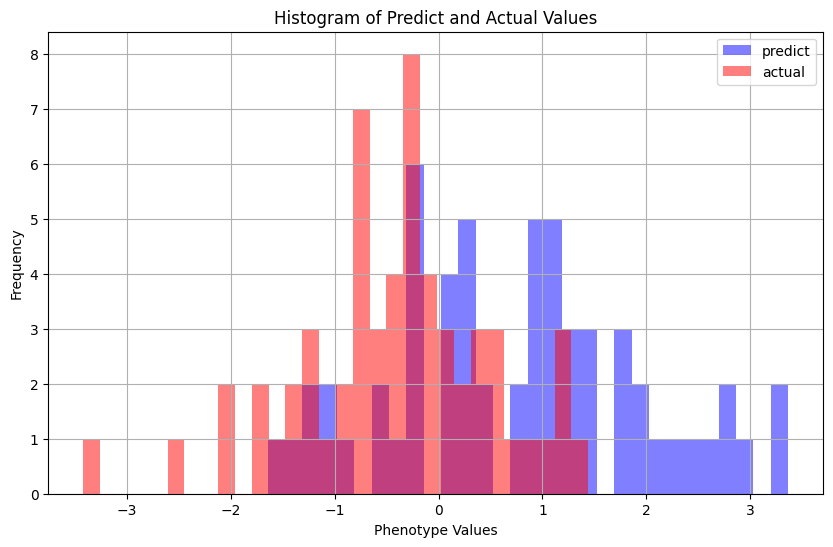

In [ ]:
df = pd.read_csv(result_file_name)

plt.figure(figsize=(10, 6))
plt.hist(df['predict'], bins=30, color='blue', alpha=0.5, label='predict')
plt.hist(df['actual'], bins=30, color='red', alpha=0.5, label='actual')

plt.title('Histogram of Predict and Actual Values')
plt.xlabel('Phenotype Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

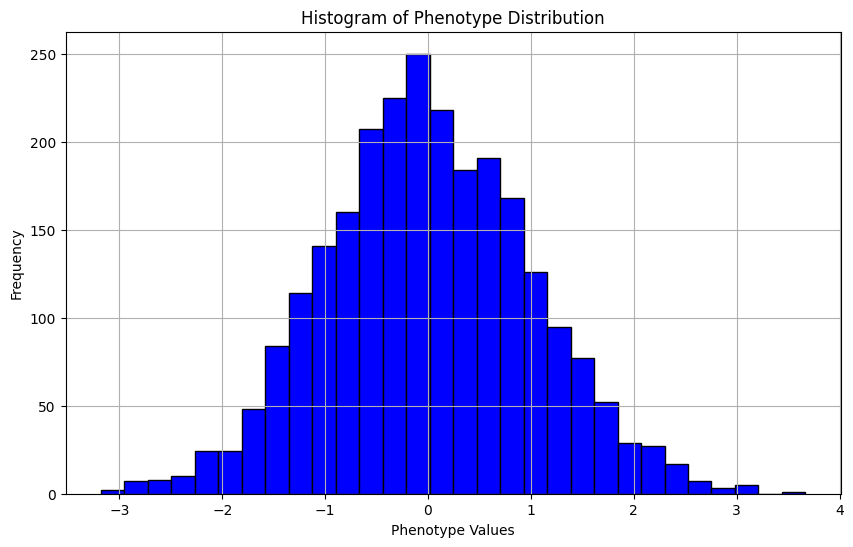

In [ ]:
data = pd.read_csv(f'{PHENO}', sep=" ", header=None)
phenotype_values = data.iloc[:, PHENO_NUM + 5]

plt.figure(figsize=(10, 6))
plt.hist(phenotype_values, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Phenotype Distribution')
plt.xlabel('Phenotype Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
!head -n 5 /content/drive/MyDrive/CSE-284-Final-Project/data/test_data/kgvcf_ldl.phen

HG00743	HG00743	-3.163135897264358
NA19759	NA19759	-3.0043490778178326
NA18979	NA18979	-2.997470340567332
NA19777	NA19777	-2.766950889364885
HG02019	HG02019	-2.726289258242937


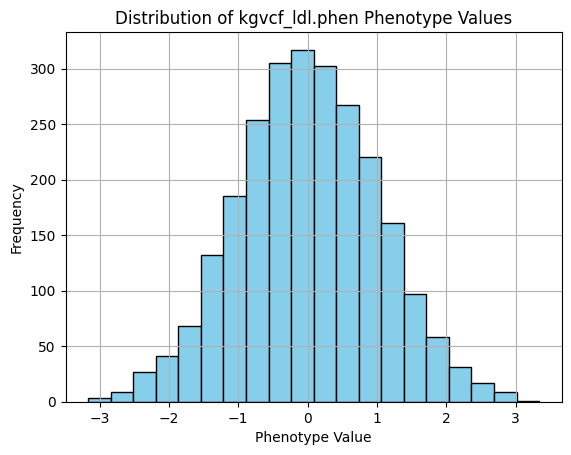

In [ ]:
import matplotlib.pyplot as plt

# Read the third column values from the file
values = []
with open('/content/drive/MyDrive/CSE-284-Final-Project/data/test_data/kgvcf_ldl.phen', 'r') as file:
    for line in file:
        parts = line.strip().split('\t')
        if len(parts) >= 3:
            try:
                value = float(parts[2])
                values.append(value)
            except ValueError:
                pass  # Ignore lines with invalid values

# Plot histogram
plt.hist(values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Phenotype Value')
plt.ylabel('Frequency')
plt.title('Distribution of kgvcf_ldl.phen Phenotype Values')
plt.grid(True)
plt.show()


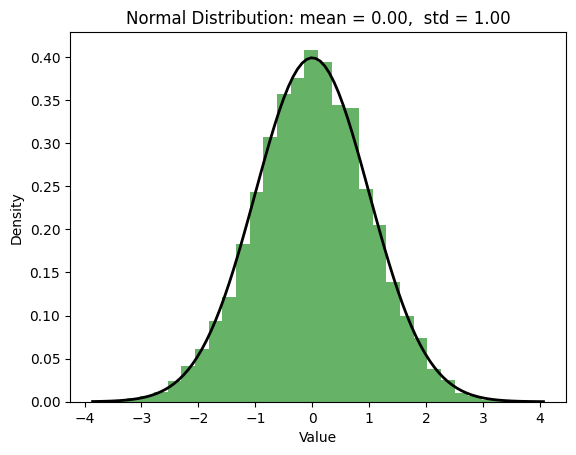

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the distribution
mean = 0
variance = 1
std_deviation = np.sqrt(variance)
num_samples = 10000

# Generate random samples from a normal distribution
samples = np.random.normal(mean, std_deviation, num_samples)

# Plot histogram
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# Overlay the probability density function
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1 / (np.sqrt(2 * np.pi) * std_deviation)) * np.exp(-0.5 * ((x - mean) / std_deviation) ** 2)
plt.plot(x, p, 'k', linewidth=2)

title = "Normal Distribution: mean = %.2f,  std = %.2f" % (mean, std_deviation)
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()


In [ ]:
!head -n 5 $PHENO

EUR_GBR HG00096 0.463342 0.585359 0.786797 -0.149097 -1.710485 0.017377 -1.076481 -0.261652 0.053231 0.670270 1.178590 -0.075979 -0.564056 -0.620686 -0.813107 -0.811549 -0.672803 -0.708367 -0.872261 0.117702 -0.222223 -0.355062 -0.329043 -0.247987 0.363967 0.264624 -0.546407 -0.742473 1.274714 -0.483934 0.295253 0.555980 0.777909 0.209575 0.648624 0.750209 -0.285529 1.525040 0.825904 -0.523525 0.221698 0.083172 -0.522321 0.558898 0.471289 1.500407 0.621698 1.185627 0.208074 0.331378 0.284803 -0.635894 -0.139794 -0.109584 -0.121049 -0.771240 -0.994922 -0.532152 0.265031 6.310163 -0.182172 0.883123 0.208097 0.252357 0.813675 -0.974714 -0.299637 0.694219 -0.133241 0.308804 0.224790 0.217472 1.220524 0.250450 0.523614 -0.085890 -1.463491 -0.509834 1.037900 -0.196927 -0.636438 -0.592436 0.050554 0.027562 0.238507 0.417381 1.052831 0.587407 -0.042816 0.448250 1.049520 0.141203 -0.167560 -0.011012 -2.367094 -0.395206 0.739904 -0.560767 -0.412144 -0.592582
EUR_GBR HG00097 0.218992 -0.125842 0.

In [ ]:
# sh = '''

# PREFIX=/content/drive/MyDrive/CSE-284-Final-Project/data

# GENO=${PREFIX}/1000g_by_superpopulation/EUR_train

# ./plink2 --bfile $GENO \
#          --pca 3 \
#          --out EUR_gwas
# '''
# with open('pca.sh', 'w') as file:
#     file.write(sh)

# # Run the script
# !bash pca.sh

In [ ]:
!head -n 5 EUR_gwas.PHENO1.clumps
!head -n 5 EUR_gwas.PHENO1.valid.snp
!head -n 5 EUR_gwas.PHENO1.pvals

In [ ]:
!head -n 10 /content/drive/MyDrive/CSE-284-Final-Project/data/1000g_pheno/power=-0.25_her=0.1_num-causals=1.phen
!head -n 30 /content/EUR_PHENO1_val.0.000001.profile

In [ ]:
!head -n 10 /content/EUR_gwas.PHENO1.glm.linear
!head -n 10 /content/drive/MyDrive/CSE-284-Final-Project/data/1000g_by_superpopulation/EUR_val.bim
# 5847346 --score file entries were skipped due to missing variant IDs.
!head -n 10 EUR_PHENO1_val.sscore.vars

#CHROM	POS	ID	REF	ALT	PROVISIONAL_REF?	A1	OMITTED	A1_FREQ	TEST	OBS_CT	BETA	SE	T_STAT	P	ERRCODE
1	11008	1:11008	C	G	Y	G	C	0.0868486	ADD	403	0.0737329	0.121668	0.60602	0.544844	.
1	11012	1:11012	C	G	Y	G	C	0.0868486	ADD	403	0.0737329	0.121668	0.60602	0.544844	.
1	13110	1:13110	G	A	Y	A	G	0.0620347	ADD	403	-0.102062	0.146873	-0.694897	0.487522	.
1	13116	1:13116	T	G	Y	G	T	0.19727	ADD	403	-0.123808	0.0870264	-1.42264	0.155617	.
1	13118	1:13118	A	G	Y	G	A	0.19727	ADD	403	-0.123808	0.0870264	-1.42264	0.155617	.
1	13273	1:13273	G	C	Y	C	G	0.133995	ADD	403	-0.124524	0.101732	-1.22404	0.221657	.
1	14464	1:14464	A	T	Y	T	A	0.187345	ADD	403	0.186968	0.0904415	2.06728	0.0393489	.
1	14599	1:14599	T	A	Y	A	T	0.163772	ADD	403	0.0291478	0.0988597	0.29484	0.768269	.
1	14604	1:14604	A	G	Y	G	A	0.163772	ADD	403	0.0291478	0.0988597	0.29484	0.768269	.
1	1:11008	0	11008	G	C
1	1:11012	0	11012	G	C
1	1:13110	0	13110	A	G
1	1:13116	0	13116	G	T
1	1:13118	0	13118	G	A
1	1:13273	0	13273	C	G
1	1:14464	0	14464	T	A
1	1:14599	0

In [ ]:
# ./plink2 \
#     --bfile $GENO_VAL \
#     --score $GLM 3 7 12 header list-variants\
#     --q-score-range range_list $PVALS \
#     --extract $VAL \
#     --out EUR_PHENO1_val

In [ ]:
sh = '''

PREFIX=/content/drive/MyDrive/CSE-284-Final-Project/data
GENO_TRAIN=${PREFIX}/1000g_by_superpopulation/EUR_train
GLM=/content/EUR_gwas.PHENO1.glm.linear
PVALS=/content/EUR_gwas.PHENO1.pvals
VAL=/content/EUR_gwas.PHENO1.valid.snp

./plink \
    --bfile $GENO_TRAIN \
    --score $GLM 3 7 12 header sum\
    --q-score-range range_list $PVALS \
    --extract $VAL \
    --out EUR_PHENO1_train
'''
with open('test.sh', 'w') as file:
    file.write(sh)
!bash test.sh

In [ ]:
sh = '''

PREFIX=/content/drive/MyDrive/CSE-284-Final-Project/data
GENO_TEST=${PREFIX}/1000g_by_superpopulation/EUR_test
GLM=/content/EUR_gwas.PHENO1.glm.linear
PVALS=/content/EUR_gwas.PHENO1.pvals
VAL=/content/EUR_gwas.PHENO1.valid.snp

./plink \
    --bfile $GENO_TEST \
    --score $GLM 3 7 12 header sum\
    --q-score-range range_list $PVALS \
    --extract $VAL \
    --out EUR_PHENO1_test
'''
with open('test.sh', 'w') as file:
    file.write(sh)
!bash test.sh